# Testing SDF
testing different functions to create signed distance functions

## Mesh_to_sdf

In [1]:
from mesh_to_sdf import mesh_to_voxels

import trimesh
import skimage
import numpy as np
import torch

mesh = trimesh.load('data/textured_chair/Chair_1.obj')

voxels = mesh_to_voxels(mesh, 64, pad=True)

vertices, faces, normals, _ = skimage.measure.marching_cubes(voxels, level=0)
mesh = trimesh.Trimesh(vertices=vertices, faces=faces, vertex_normals=normals)
mesh.show()

In [10]:
print(voxels.min())

invertedVoxel = np.where(voxels < 0, 1,0)

print(invertedVoxel)


-0.06274752
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


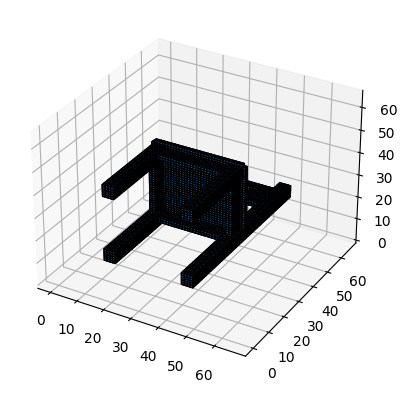

In [11]:
import matplotlib.pyplot as plt

ax = plt.figure().add_subplot(projection='3d')
ax.voxels(invertedVoxel, edgecolor='k')

plt.show()

In [14]:
from trimesh.voxel.creation import voxelize

def show(chair_mesh, chair_voxels, colors=(1, 1, 1, 0.3)):
    scene = chair_mesh.scene()
    scene.add_geometry(chair_voxels.as_boxes(colors=colors))
    scene.show()

show(mesh, invertedVoxel , colors=(1, 1, 1, 0.3))

AttributeError: 'numpy.ndarray' object has no attribute 'as_boxes'

In [ ]:

vertices, faces, normals, _ = skimage.measure.marching_cubes(voxels, level=0)
mesh = trimesh.Trimesh(vertices=vertices, faces=faces, vertex_normals=normals)
mesh.show()

### voxelGrid to Tensor

In [10]:
shapedData = np.reshape(voxels, [1, 1, 66, 66, 66])[:,:,:64,:64,:64]
print(shapedData.shape)
torch.save(shapedData, "data/voxelChair.pt")

(1, 1, 64, 64, 64)


## mesh2sdf

In [13]:
import trimesh
import mesh2sdf
import numpy as np
import time
import generationtools as gnt

size = 64

mesh = trimesh.load('data/Chair_1_Half.obj')
t0 = time.time()
sdf,mesh = gnt.mesh_to_sdf_tensor(mesh, size)
t1 = time.time()

# output
mesh.export("data/Chair" + '.fixed.obj')
np.save("data/Chair" + '.npy', sdf)
print('It takes %.4f seconds to process' % (t1-t0))
mesh.show()

It takes 2.1301 seconds to process


### Sdf To tensor

In [14]:
import torch
shapedData = np.reshape(sdf, [1, 1, 64, 64, 64])
print(shapedData[:,:,:64,:64,:64].shape)

torch.save(shapedData[:,:,:64,:64,:64], "data/half_chair.pt")

(1, 1, 64, 64, 64)
